# <span style='color:OrangeRed'>V8 - Regelung im Zustandsraum</span>

In [1]:
from systheo2functions import *
%matplotlib inline

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System:
<br>    $A$ = $\left[ \begin{array}{rrrr}
           1 & 1  \\
          -2 & -1  \\
          \end{array}\right] $
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           0   \\
           1   \\
          \end{array}\right] $
<br><br>    $C$ =  $\left[ \begin{array}{rrrr}
           1 & 0  \\
           \end{array}\right] $
<br><br>    $D$ = $0$ .


Zunächst prüfen wir die Steuerbarkeit des Systems über den Rang der Steuerbarkeitsmatrix:
<br><br>    $S_c$ =  $\left[ \begin{array}{rrrr}
           B & AB  \\
           \end{array}\right] $ = $\left[ \begin{array}{rrrr}
           0 & 1  \\
          1 & -1  \\
          \end{array}\right] {\Rightarrow} Rang~S_c  = 2$  

In [2]:
A = np.array([[1,1],
              [-2,-1]])

B = np.array([[0],
              [1]])

C = np.array([1,0])

D = np.array([0])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Prüfe die Steuerbarkeit mittels Rang-Funktion:

In [3]:
print('Steuerbarkeit des Systems:');
column1 = B
column2 = np.matmul(A,B)
S_c = np.c_[column1,column2]
print("S_c:\n"+str(S_c)+"\n")
print_rank(S_c)

Steuerbarkeit des Systems:
S_c:
[[ 0  1]
 [ 1 -1]]

Rang: 2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir sehen, wie erwartet, dass der Rang der Matrix 2 ergibt.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Im nächsten Schritt ermitteln wir die Eigenwerte des offenen Regelkreises:


In [4]:
print_eig(A)

Eigenwerte:
(-0+1j)
(-0-1j)


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das offene System ist grenzstabil mit den Eigenwerten: $p_{1} = 0+j$ , $p_{2} = 0-j$ 
<br><br>Gebe nun für den geschlossenen Regelkreis diese zwei Pole vor, sodass eine Verschiebung in die linke Halbebene erfolgt:

In [5]:
print('Regler');
pd = [-3+1j*3,-3-1j*3]
print("pd:"+str(pd))
F = signal.place_poles(A, B, pd).gain_matrix
print("F:"+str(F))

Regler
pd:[(-3+3j), (-3-3j)]
F:[[23.  6.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
So erhalten wir ein stabiles System.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zur Veranschaulichung bilden wir zunächst dem folgenden Simulinkmodell nach. Wir fangen mit dem offenen Regelkreis <span style='color:Red'>A</span>  an:

<img src="bilder/v08_A.png" width="700"/>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das System hat den Eingang Null, so erwarten wir an dieser Stelle im nächsten Schritt die homogene Lösung.

In [6]:
#Regelkreis A

tini = 0 # Start time
tfinal = 10 # End time
dt = 0.01 # Time Step
nflows = 6 # Number of data flows in the schematic

xo = np.array([[2],
               [2]])
C2 = np.array([[1, 0],
               [0, 1]])

sc = Schema(tini,tfinal,dt,nflows) # Instance of the simulation schematic

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br> List of components:
<br><br><span style='color:Orange'>Constant Function Definition:</span>
    <br><code>Constant(1.argument = Output_1, 2.argument = constant value)</code>

In [7]:
c1_1 = Constant(1,0);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>StateSpace Function Definition:</span>
<br><code>StateSpace(1.argument = input_1, 2.argument= output_2 & output_3, 3.argument= A, 4.argument=  B, 5.argument= initial conditions x0)

In [8]:
c1_2 = StateSpace([1],[2,3],A,B,C2,D,xo);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>Gain Function Definition:</span>
<br><code>Gain(1.argument = input_2 & input_3, 2.argument = output_4, 3.argument= gain value)

In [9]:
c1_3 = Gain([2,3],[4],-F); 

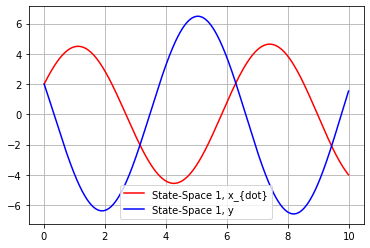

In [10]:
sc.AddListComponents(np.array([c1_1,c1_2,c1_3]));

# Run the schematic and plot
out1 = sc.Run(np.array([2, 3, 4]));
plt.plot(out1[0,:],out1[1,:],'r',out1[0,:],out1[2,:], 'b'); #Output Signal 1 & 2
plt.grid()
plt.legend(['State-Space 1, x_{dot}','State-Space 1, y'])
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wie beim grenzstabilen System zu erwarten, erkennen wir eine perfekte Oszillation.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Hier betrachten wir den Verlauf unseres des Verstärkerelements F:

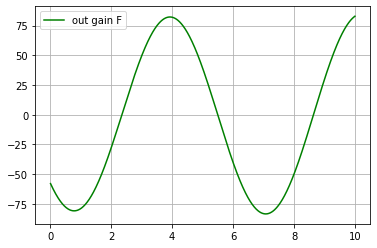

In [11]:
plt.plot(out1[0,:],out1[3,:],'g'); # Output_4
plt.grid()
plt.legend(['out gain F'])
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Im nächsten Schritt schließen wir den Regelkreis:

<img src="bilder/v08_B.png" width="700"/>

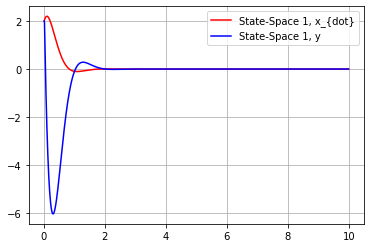

In [12]:
#Regelkreis B

# Instance of the simulation schematic
sc2 = Schema(tini,tfinal,dt,nflows)

# List of components
c2_1 = Constant(1,0); #Just for reference for plotting graph, not being used here.
c2_2 = StateSpace([4],[2,3],A,B,C2,D,xo);
c2_3 = Gain([2,3],[4],-F); 

sc2.AddListComponents(np.array([c2_1,c2_2,c2_3]));

# Run the schematic and plot
out2 = sc2.Run(np.array([1,2,3,4]));
plt.plot(out2[0,:],out2[2,:],'r',out2[0,:],out2[3,:], 'b'); #Output Signal 1 & 2
plt.grid()
plt.legend(['State-Space 1, x_{dot}','State-Space 1, y'])
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun sehen wir, dass innerhalb von 2 Sekunden das System in den stabilen Zustand übergeht.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wieder betrachten wir den Verlauf am Verstärkerelement F:

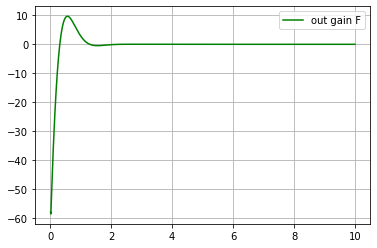

In [13]:
plt.plot(out2[0,:],out2[4,:],'g'); # Output_4
plt.grid()
plt.legend(['out gain F'])
plt.show()


## <span style='color:Gray'>Beispiel #2 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System aus <span style='color:Gray'>Beispiel #1</span>.

In [14]:
A = np.array([[1,1],
              [-2,-1]])

B = np.array([[0],
              [1]])

C = np.array([1,0])

D = np.array([0])

xo = np.array([[2],
               [2]])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun möchten wir die Regelgröße fixieren. Im stationären Zustand soll nun die Regelgröße der Führungsgröße entsprechen. Hierfür ermitteln wir den Vorfilter $V$ mit: <br> $V$ =  $[C(BF-A)^{-1}B]^{-1}$   

In [15]:
print('Steuerbarkeit des Systems:');

column1 = B
column2 = np.matmul(A,B)
W = np.c_[column1,column2]

print("W:\n"+str(W)+"\n")

print_rank(W)

Steuerbarkeit des Systems:
W:
[[ 0  1]
 [ 1 -1]]

Rang: 2


In [16]:
print_eig(A)

Eigenwerte:
(-0+1j)
(-0-1j)


In [17]:
print('Regler')
pd = [-3+1j*3,-3-1j*3]
print("pd:"+str(pd))
F = control.place(A, B, pd)
print("F:"+str(F))

Regler
pd:[(-3+3j), (-3-3j)]
F:[[23.  6.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Als Eingang wird in Simulink der Einheitssprung gewählt. Wir fügen nun den Vorfilter V als Gain Komponente ein:

<img src="bilder/v08_beispiel2.png" width="700"/>

In [18]:
V = np.array([1/(np.matmul(C,np.matmul(inv(np.matmul(B,F)-A),B)))])
print("V = inv(C*inv(B*F-A)*B)")
print("V: "+str(V))

V = inv(C*inv(B*F-A)*B)
V: [[18.]]


In [19]:
nflows2 = 8 # Number of data flows in the schematic

C2 = np.array([[1, 0],
               [0, 1]])

sc3 = Schema(tini,tfinal,dt,nflows2) # Instance of the simulation schematic

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br> List of components:


In [20]:
c3_1 = StepSource(1,0,1,1)
c3_2 = Gain([1],[2],V)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>Sum Function Definition:</span>
<br><code>Sum(1.argument = input_2, 2.argument = input_3, 3.argument = output_4, 4.argument = first sign , 5.argument = second sign )</code>

In [21]:
c3_3 = Sum(2,3,4,1,1) 

In [22]:
c3_4 = StateSpace([4],[5,6],A,B,C2,D,xo)
c3_5 = Gain([5,6],[3],-F)
c3_6 = Gain([5,6],[7],np.array([[0,1]]))

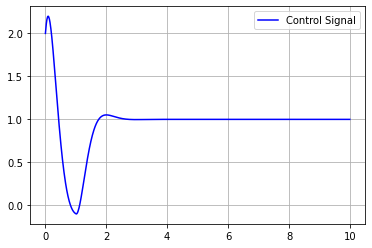

In [23]:
sc3.AddListComponents(np.array([c3_1,c3_2,c3_3,c3_4,c3_5,c3_6]));

#Run the schematic and plot
out3 = sc3.Run(np.array([1,2,3,4,5,6]));
plt.plot(out3[0,:],out3[5,:],'b');
plt.grid()
plt.legend(['Control Signal'])
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das Ergebnis zeigt, dass im stationären Zustand die Regelgröße der Führungsgröße entspricht

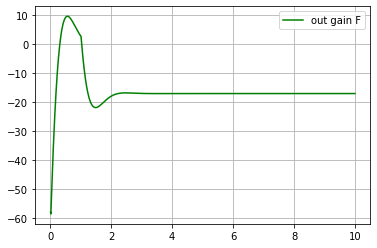

In [24]:
plt.plot(out3[0,:],out3[3,:],'g'); # Output_3
plt.legend(['out gain F'])
plt.grid()
plt.show()

## <span style='color:Gray'>Beispiel #3  </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das bekannte System aus der Vorlesung:
<br>    $A$ = $\left[ \begin{array}{rrrr}
           -1 & 0 & 0  \\
            1 & -2 & 0  \\
            0 & 5 & 0   \\
          \end{array}\right] $   
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           1  \\
           0   \\
           0   \\
          \end{array}\right] $

In [25]:
A = np.array([[-1,0,0],
              [1,-2,0],
              [0, 5,0]])

B = np.array([[1],
              [0],
              [0]])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst ermitteln wir die Steuerbarkeitsmatrix:

In [26]:
print('Steuerbarkeitsmatrix:');

column1 = B
column2 = np.matmul(A,B)
column3 = matmul_loop([A,A,B])
S_c = np.c_[column1,column2,column3]

print("S_c:\n"+str(S_c)+"\n")

Steuerbarkeitsmatrix:
S_c:
[[ 1 -1  1]
 [ 0  1 -3]
 [ 0  0  5]]



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es wird lediglich die letzte Reihe (n=3) der inversen Steuerbarkeitsmatrix betrachtet ($s_{c_{n}}^T$):

In [27]:
S_c_inv = np.linalg.pinv(S_c)
print("S_c_inv:\n"+str(S_c_inv))
s_c_n = S_c_inv[2,:]
print("\ns_c_n:\n"+str(s_c_n))

S_c_inv:
[[ 1.00000000e+00  1.00000000e+00  4.00000000e-01]
 [-5.88324776e-18  1.00000000e+00  6.00000000e-01]
 [-4.57033997e-17 -1.17458319e-16  2.00000000e-01]]

s_c_n:
[-4.57033997e-17 -1.17458319e-16  2.00000000e-01]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Da die Inverse ausgegeben werden kann, ist dies ein Beweis dass das System steuerbar ist, denn die Determinante ist ungleich Null.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun wird die Polvorgabe durchgeführt:

In [28]:
print('Polvorgabe')
print('p1 = -2, p2,3= -1+/-J')
P = np.array([4,6,4,1])
p1 = -2
p2 = -1+1j
p3 = -1-1j

v1 = s_c_n
v2 = np.matmul(s_c_n,A)
v3 = matmul_loop([s_c_n,A,A])
v4 = matmul_loop([s_c_n,A,A,A])
print("\nv1:\n"+str(v1))
print("\nv2:\n"+str(v2))
print("\nv3:\n"+str(v3))
print("\nv4:\n"+str(v4))

Polvorgabe
p1 = -2, p2,3= -1+/-J

v1:
[-4.57033997e-17 -1.17458319e-16  2.00000000e-01]

v2:
[-7.17549193e-17  1.00000000e+00  0.00000000e+00]

v3:
[ 1. -2.  0.]

v4:
[-3.  4.  0.]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun wird die Polvorgabe durchgeführt:

In [29]:
F2 = signal.place_poles(A, B, np.array([p1, p2, p3])).gain_matrix 
print("F2: "+str(F2))#Nach Polvergabe ist F2 = F

F2: [[1.  2.  0.8]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

$f^T = p_{0}s_{c_{n}}^{T} + p_{1}s_{c_{n}}^{T}A +  p_{1}s_{c_{n}}^{T}A^2 + p_{1}s_{c_{n}}^{T}A^3$

In [30]:
F = [P[0]*v1+P[1]*v2+P[2]*v3+P[3]*v4] #Rückführfaktor
print("F: "+str(F))

F: [array([1. , 2. , 0.8])]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Polvorgabe erfolgte durch die Wahl der charakteristischen Gleichung:
<br> $P(s) = 4 + 6s + 4s^2 + s^3 $
<br> Damit erhält man schließlich den Rückführvektor:
<br> $f^T$ =  $4 \left[ \begin{array}{rrrr}
             0 & 0  & \frac{1}{5}  \\
           \end{array}\right]
            +  6 \left[ \begin{array}{rrrr}
             0 & 1  & 0  \\
           \end{array}\right]
          + 4 \left[ \begin{array}{rrrr}
             1 & -2  & 0  \\
           \end{array}\right]
          + 6 \left[ \begin{array}{rrrr}
             -3 & 4  & 0  \\
           \end{array}\right]$
<br><br> $f^T$ = $6 \left[ \begin{array}{rrrr}
             1 & 2  & \frac{4}{5}  \\
           \end{array}\right]$

## <span style='color:Gray'>Beispiel #4  </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System:

In [31]:
A1 = np.array([[1,0],
               [0,-1]])

B1 = np.array([[1],
               [0]])

C2 = np.array([[1,0],
               [0,1]])

D1 = np.array([[0],
               [0]])

F = np.array([[4,0]])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das offene System ist instabil und nicht steuerbar!

<img src="bilder/v08_A.png" width="700"/>

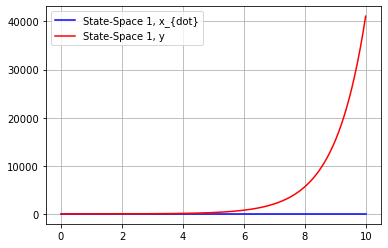

In [32]:
tini = 0 # Start time
tfinal = 10 # End time
dt = 0.01 # Time Step
nflows = 5

xo = np.array([[2],[2]])

sc4 = Schema(tini,tfinal,dt,nflows) # Instance of the simulation schematic

c4_1 = Constant(1,0);
c4_2 = StateSpace([1],[2,3],A1,B1,C2,D1,xo);
c4_3 = Gain([2,3],[4],-1*F);

sc4.AddListComponents(np.array([c4_1,c4_2,c4_3]));

#Run the schematic and plot:
out4 = sc4.Run(np.array([1, 2, 4]));

plt.plot(out4[0,:],out4[1,:],'blue',out4[0,:],out4[2,:],'red')
plt.grid()
plt.legend(['State-Space 1, x_{dot}','State-Space 1, y'])
plt.show()

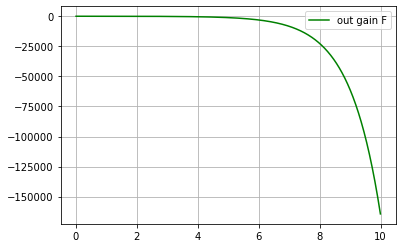

In [33]:
plt.plot(out4[0,:],out4[3,:],'g')# Output_4
plt.legend(['out gain F'])
plt.grid()
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der erste Pol kann also mittels $F_1$  verschoben werden, sodass das System stabil wird!

<img src="bilder/v08_B.png" width="700"/>

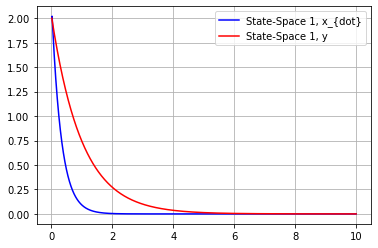

In [34]:
sc5 = Schema(tini,tfinal,dt,nflows) # Instance of the simulation schematic

c5_1 = Constant(1,0);
c5_2 = StateSpace([4],[2,3],A1,B1,C2,np.array([0]),xo);
c5_3 = Gain([2,3],[4],-1*F);

sc5.AddListComponents(np.array([c5_1,c5_2,c5_3]));

# Run the schematic and plot
out5 = sc5.Run(np.array([1,2,3,4]))
plt.plot(out5[0,:],out5[2,:],'b', out5[0,:],out5[3,:],'r'); #Output Signal 2 & 3
plt.legend(['State-Space 1, x_{dot}','State-Space 1, y'])
plt.grid()
plt.show()

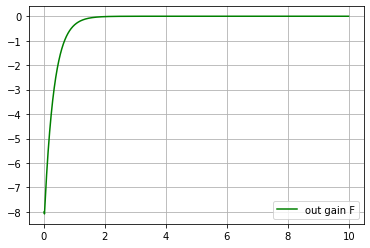

In [35]:
plt.plot(out5[0,:],out5[4,:],'g') # Output_4
plt.legend(['out gain F'])
plt.grid()
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das System wurde durch Polplatzierung stabilisiert.

## <span style='color:Gray'>Beispiel #5 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System aus <span style='color:Gray'>Beispiel #1</span>.




In [36]:
A = np.array([[1,1],
              [-2,-1]])

B = np.array([[0],
              [1]])

C = np.array([1,0])

D = np.array([0])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das charakteristische Polynom ist gegeben:
<br><br> $P(s)$ = $s^2$ + 2$\xi$$\omega_0$ +  $\omega_r$ $mit$ $\xi = 0,7$ $und$ $\omega_r=2$ 

Da $\xi = 0.7$ erhalten wir komplexe Pole. Mit $\omega_r$ wir die Geschwindigkeit des Systems einstellen. Die natürliche Frequenz  $\omega_0$ wird mit jeder Iteration um $2$ erhöht.

Steuerbarkeit des Systems:
S_c:
[[ 0  1]
 [ 1 -1]]
Rang: 2

Eigenwerte A:
Eigenwerte:
(-0+1j)
(-0-1j)

Regler:

input signal u


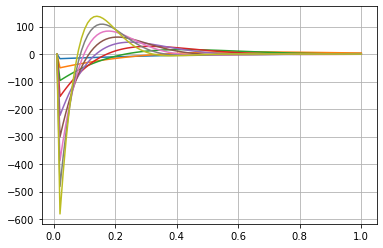


output signal y


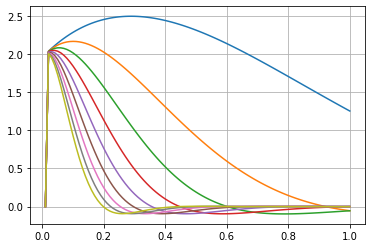

In [37]:
print('Steuerbarkeit des Systems:')

column1 = B
column2 = np.matmul(A,B)
S_c = np.c_[column1,column2]
print("S_c:\n"+str(S_c))

print_rank(S_c)

print('\nEigenwerte A:');
print_eig(A)

print('\nRegler:');

csi = 0.7;
omr = 2;
u = np.zeros((10,100))
y = np.zeros((10,100))


for i in range(1,10):
    omo = i*omr
    pd = np.array([-csi*omo+1j*omo*sqrt(1-csi*csi),-csi*omo-1j*omo*sqrt(1-csi*csi)])
    F = signal.place_poles(A,B,pd).gain_matrix
    xini = [[2],
            [2]]
    Acl = A-np.matmul(B,F)
    deltat=0.01
    for q in range(1,100):
        y[i][q] = matmul_loop([C,linalg.expm(Acl*deltat*q),xini])
        u[i][q] = matmul_loop([-1*F,linalg.expm(Acl*deltat*q),xini])

%matplotlib inline

print("\ninput signal u")

for i in range(1,10):
    plt.plot(np.array(range(1, 101))*deltat,u[i,:]);
plt.grid()
plt.show()

print("\noutput signal y")

for i in range(1,10):
    plt.plot(np.array(range(1, 101))*deltat,y[i,:]);
plt.grid()
plt.show()

## <span style='color:Gray'>Beispiel #6 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben sei das System aus <span style='color:Gray'>Beispiel #1</span>. Es gilt $T_s=0.1$.


In [38]:
A = np.array([[1,1],
              [-2,-1]])

B = np.array([[0],
              [1]])

C = np.array([1,0])

D = np.array([0])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Prüfe die Steuerbarkeit mittels Rang-Funktion:

In [39]:
print('Steuerbarkeit des Systems:')
column1 = B
column2 = np.matmul(A,B)
S_c = np.c_[column1,column2]
print("S_c:\n"+str(S_c))

print_rank(S_c)

Steuerbarkeit des Systems:
S_c:
[[ 0  1]
 [ 1 -1]]
Rang: 2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Ermittle Eigenwerte für den offenen Regelkreis:

In [40]:
print('\nEigenwerte A:');
print_eig(A)


Eigenwerte A:
Eigenwerte:
(-0+1j)
(-0-1j)


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gebe nun für den geschlossenen Regelkreis diese zwei Pole vor:

In [41]:
print('Regler:');
pd = np.array([-3+3j,-3-3j])
print("Polstellen: "+str(pd))

F = signal.place_poles(A,B,pd).gain_matrix
print("F: "+str(F))

Regler:
Polstellen: [-3.+3.j -3.-3.j]
F: [[23.  6.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Abtast:

In [42]:
Ts = 0.1

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    Die Regelstrecke soll diskretisiert werden. So erhalten wir <code>A_d</code> und <code>B_d</code>:

In [43]:
Ad = linalg.expm(A*Ts)
print("Ad:\n"+str(Ad))

einh = np.array([[1,0],
                 [0,1]])
Bd = matmul_loop([(Ad-einh),inv(A),B])
print("\nBd:\n"+str(Bd))

Ad:
[[ 1.09483758  0.09983342]
 [-0.19966683  0.89517075]]

Bd:
[[0.00499583]
 [0.09483758]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die korrespondierenden (beliebigen) Pole im zeitdiskreten System lauten:

In [44]:
pdd = np.array(exp(pd*Ts))
print("\npdd: "+str(pdd))


pdd: [0.70773068+0.21892675j 0.70773068-0.21892675j]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
In diesem Fall wird dem Regler das diskrete Signal zugeführt:

In [45]:
Fd = signal.place_poles(Ad,Bd,pdd).gain_matrix
print("Fd: "+str(Fd))

Fd: [[17.48338056  5.13723447]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Vergleicht man die Werte aus <span style='color:Gray'>Beispiel #1</span>, mit den Werten des diskretisierten Systems, ist
eine Abweichung zu erkennen, da $f^T$=[23  6] zuvor galt!
<br><br>Veranschaulichung durch Simulink:

<img src="bilder/v08_beispiel6.png" width="700"/>

In [46]:
# Instance of the simulation schematic
nflowsd = 12
tfinal = 4
dt = 0.01

C2 = np.array([[1,0],
               [0,1]])
sc6 = Schema(tini,tfinal,dt,nflowsd);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br> List of components:

In [47]:
c6_1 = StateSpace([1],[2,3],A,B,C2,D,xo);
c6_2 = Gain([2,3],[4],-1*Fd);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>Zero order hold (ZOH) Function Definition:</span>
<br><code>ZOH(1.argument = input_4, 2.argument = output_1, 3.argument = sample time )</code>

In [48]:
c6_3 = ZOH(4,1,Ts);

In [49]:
c6_4 = StateSpace([5],[6,7],A,B,C2,D,xo);
c6_5 = Gain([6,7],[8],-1*F);
c6_6 = ZOH(8,5,Ts);
c6_7 = StateSpace([9],[10,11],A,B,C2,D,xo);
c6_8 = Gain([10,11],[9],-F);
#c6{9} = Gain([2 3],12,[0 1]);
#c6{10} = Gain([6 7],13,[0 1]);

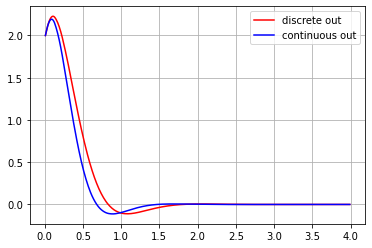

In [50]:
sc6.AddListComponents(np.array([c6_1,c6_2,c6_3,c6_4,c6_5,c6_6,c6_7,c6_8]))

out6 = sc6.Run(np.array([1,2,3,4,5,6,7,8,9,10]))
plt.plot(out6[0,:],out6[2,:],'r', out6[0,:],out6[6,:],'b');
plt.legend(['discrete out','continuous out'])
plt.grid()
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Je kleiner die Abtastzeit gewählt wird, desto kleiner wäre auch die Abweichung.
Höhere Abtastzeiten bedeuten jedoch einen höheren Rechenaufwand!

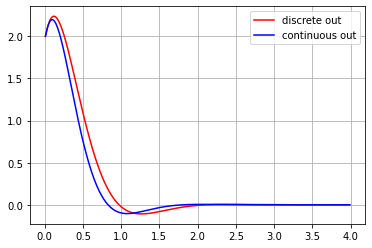

In [51]:
Ts2 = 0.01;

sc7 = Schema(tini,tfinal,dt,nflowsd);

c7_1 = StateSpace([1],[2,3],A,B,C2,D,xo) #wie bei c6_1
c7_2 = Gain([2,3],[4],-1*Fd) #wie bei c6_2
c7_4 = StateSpace([5],[6,7],A,B,C2,D,xo) #wie bei c6_4
c7_5 = Gain([6,7],[8],-1*F) #wie bei c6_5
c7_7 = StateSpace([9],[10,11],A,B,C2,D,xo) #wie bei c6_7
c7_8 = Gain([10,11],[9],-F) #wie bei c6_8

c7_3 = ZOH(4,1,Ts2); #wie bei c6_3 nur Ts wird hier zu Ts2 geändert
c7_6 = ZOH(8,5,Ts2); #wie bei c6_6 nur Ts wird hier zu Ts2 geändert

sc7.AddListComponents(np.array([c7_1,c7_2,c7_3,c7_4,c7_5,c7_6,c7_7,c7_8])) #Alles ohne Ts bleibt gleich

out7 = sc7.Run(np.array([1,2,3,4,5,6]))
plt.plot(out7[0,:],out7[2,:],'r', out7[0,:],out7[6,:],'b');
plt.legend(['discrete out','continuous out'])
plt.grid()
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das kontinuerliche System wird bei einer kleineren Abtastzeit $T_s=0.01$ hinreichend genau abgebildet.